In this Notebook, I perform Explonatory Data Analysis and Data Transformation on the Skin Cancer Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob


In [2]:
base_skin_dir = "/home/ahmed/Datasets/skin_canser/dataverse_files"
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata')) # load in the data
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}

lesion_danger = {
    'nv': 0, # 0 for benign
    'mel': 1, # 1 for malignant
    'bkl': 0, # 0 for benign
    'bcc': 1, # 1 for malignant
    'akiec': 1, # 1 for malignant
    'vasc': 0,
    'df': 0
}

In [4]:
skin_df["path"] = skin_df["image_id"].map(imageid_path_dict.get) # map image_id to the path of that image

In [5]:
skin_df["path"] = skin_df["image_id"].map(imageid_path_dict.get) # map image_id to the path of that image

In [6]:
skin_df["cell_type"] = skin_df["dx"].map(lesion_type_dict.get) # map dx to type of lesion

In [7]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions


In [8]:
skin_df["Malignant"] = skin_df["dx"].map(lesion_danger.get)

In [9]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,Malignant
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions,0


In [10]:
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes # give each cell type a category id

In [11]:
skin_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,Malignant,cell_type_idx
559,HAM_0004426,ISIC_0026378,bkl,histo,50.0,male,face,rosendahl,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Benign_keratosis-like_lesions,0,2
5586,HAM_0002520,ISIC_0032177,nv,follow_up,45.0,male,back,vidir_molemax,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Melanocytic_nevi,0,4
8296,HAM_0001525,ISIC_0025662,nv,histo,35.0,male,upper extremity,vienna_dias,/home/ahmed/Datasets/skin_canser/dataverse_fil...,Melanocytic_nevi,0,4


<AxesSubplot:title={'center':'Benign vs Malignant'}>

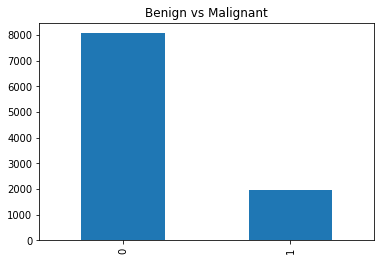

In [12]:
skin_df["Malignant"].value_counts().plot(kind="bar", title="Benign vs Malignant")

Most cases in our dataset are benign.

<AxesSubplot:title={'center':'Counts for each type of Lesions'}>

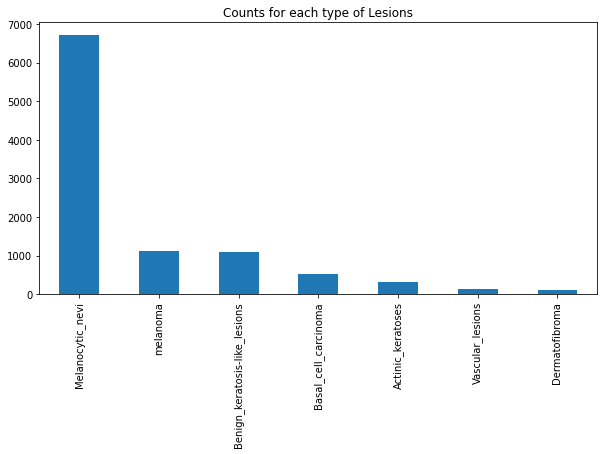

In [13]:
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
skin_df["cell_type"].value_counts().plot(kind="bar", ax=ax1, title="Counts for each type of Lesions") # plot a graph counting the number of each cell type

Our dataset is biased toward Melanocytic nevi. The cell_type with the second highest samples is the noctorious melanoma

<AxesSubplot:title={'center':'Location of Lesions'}>

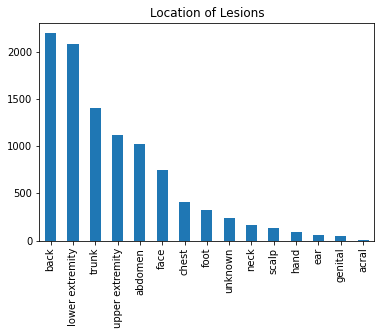

In [14]:
# let's see where lesions are mostly located
skin_df["localization"].value_counts().plot(kind='bar', title="Location of Lesions")

<AxesSubplot:title={'center':'Treatment received'}>

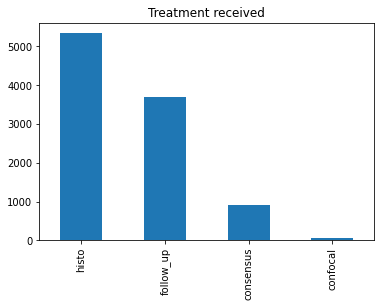

In [15]:
skin_df["dx_type"].value_counts().plot(kind='bar', title="Treatment received")

Description for each dx_type:

histo: "Histopathologic diagnoses of excised lesions have been performed by specialized dermatopathologists."

follow_up: "If nevi monitored by digital dermatoscopy did not show any changes during 3 follow-up visits or 1.5 years we accepted this as evidence of biologic benignity. Only nevi, but no other benign diagnoses were labeled with this type of ground-truth because dermatologists usually do not monitor dermatofibromas, seborrheic keratoses, or vascular lesions."

consensus: "For typical benign cases without histopathology or follow-up we provide an expertconsensus rating of authors PT and HK. We applied the consensus label only if both authors independently gave the same unequivocal benign diagnosis. Lesions with this type of ground-truth were usually photographed for educational reasons and did not need further follow-up or biopsy for
confirmation."

confocal: "Reflectance confocal microscopy is an in-vivo imaging technique with a resolution at near-cellular level, and some facial benign keratoses were verified by this method."

Let's look at some characteristics of our patients

<AxesSubplot:>

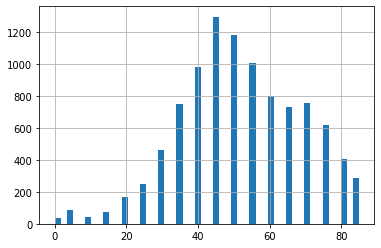

In [16]:
skin_df["age"].hist(bins=50)

<AxesSubplot:>

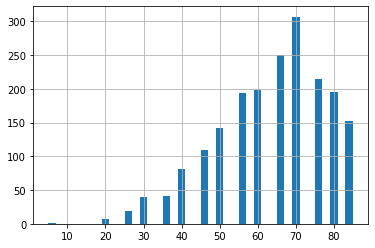

In [17]:
skin_df[skin_df["Malignant"] == 1]["age"].hist(bins=40)

We can see that most of patients are above 30. But for the malignant cases, most patients are 50 and above,  and 70s - year - old patients are the most present.

<AxesSubplot:title={'center':'Male vs Female'}>

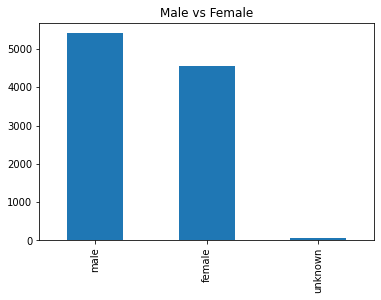

In [18]:
skin_df["sex"].value_counts().plot(kind="bar", title="Male vs Female")

<AxesSubplot:title={'center':'Male vs Female. Malignant Cases'}>

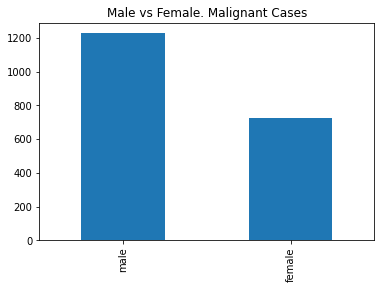

In [19]:
skin_df[skin_df["Malignant"] == 1]["sex"].value_counts().plot(kind="bar", title="Male vs Female. Malignant Cases")

We have more male patients than female patients in both general population and in malignant case. So far we haven't looked at our image yet. So let's now change our focus into how lesions in our dataset look like.

In [20]:
from skimage.io import imread

In [21]:
skin_df["image"] = skin_df["path"].map(imread) # read the image to array values

In [23]:
# let's see what is the shape of each value in the image column
skin_df["image"].map(lambda x: x.shape).value_counts() 

(450, 600, 3)    10015
Name: image, dtype: int64

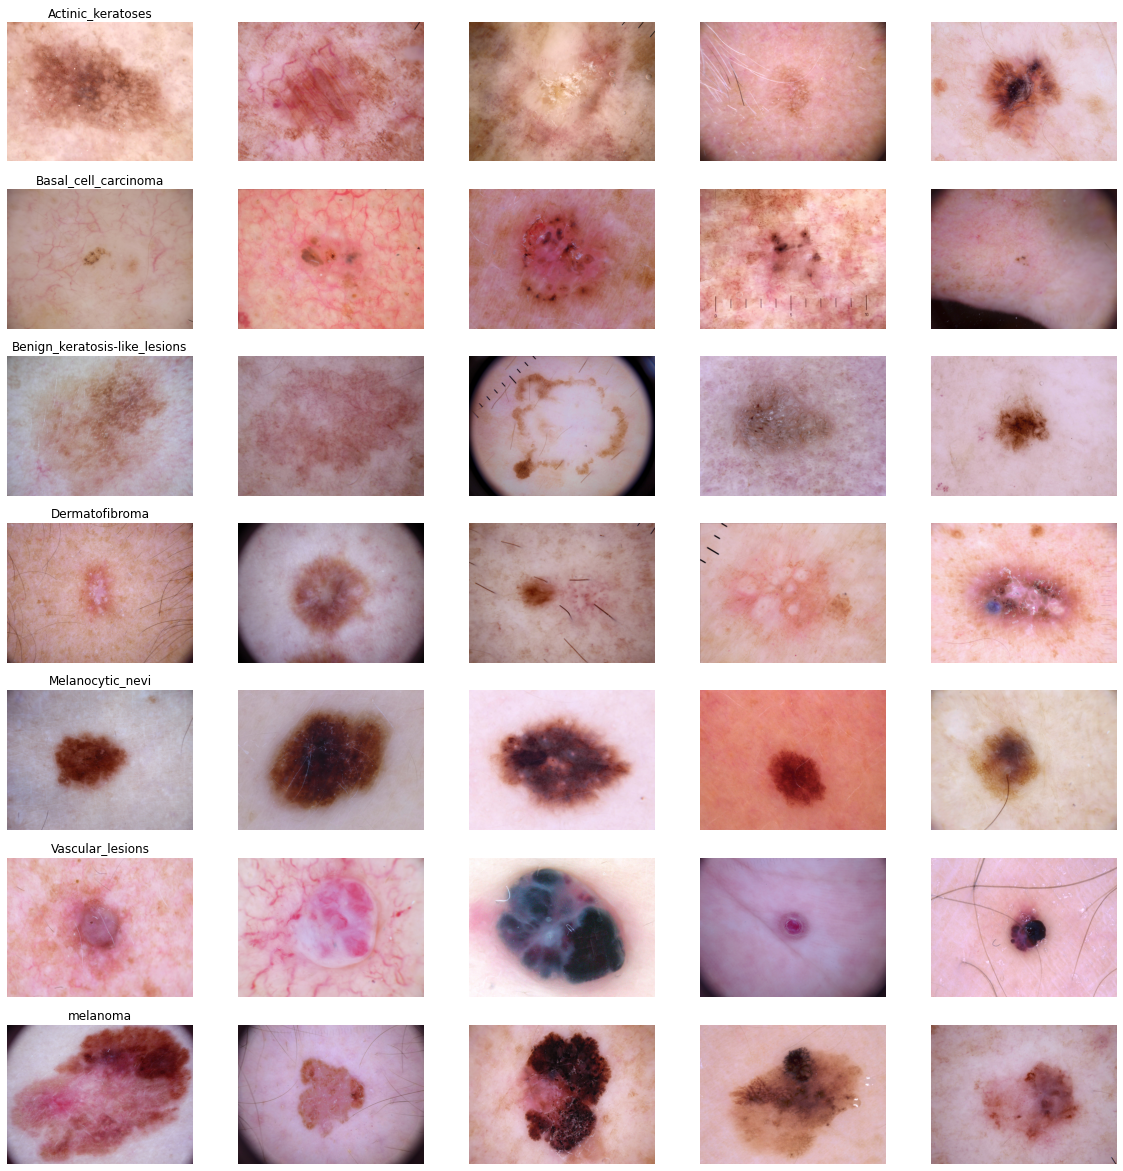

In [24]:
# let's have a look at the image data

n_samples = 5 # choose 5 samples for each cell type
fig, m_axs = plt.subplots(7, n_samples, figsize=(4*n_samples, 3 * 7))

for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(["cell_type"]).groupby("cell_type")):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=0).iterrows()):
        c_ax.imshow(c_row["image"])
        c_ax.axis("off")
fig.savefig("category_samples.png", dpi=300)

Based on these images, it is still very hard for non-experts to know which is which.

Now we will save images into folders, where each folder holds all the images for a specific class

In [25]:
import os
import shutil
def save_images_to_folders(element):
    root = "dataset"
    
    os.makedirs(os.path.join(root,element['dx']), exist_ok=True)

    shutil.copyfile(element['path'], os.path.join(root,element['dx'],os.path.basename(element['path'])))
    
    

In [26]:
skin_df.apply(save_images_to_folders,axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
10010    None
10011    None
10012    None
10013    None
10014    None
Length: 10015, dtype: object

# Training Pytorch Model
Importing required libs

In [27]:
import timm
import torch
import torchvision
from torchvision import transforms
from os.path import join
from torch.utils.data.dataloader import DataLoader
from progressbar import progressbar
from timm.loss import LabelSmoothingCrossEntropy
from torch.optim.lr_scheduler import OneCycleLR, CosineAnnealingLR


Defining variables

In [46]:
dataset_url = "dataset"
input_size = 224
batch_size = 32
num_workers = 12
epochs = 40
lr = .0001
num_classes = 7
model_name = "convnextv2_femto.fcmae_ft_in1k"

Creating Dataloaders

In [43]:
full_dataset = torchvision.datasets.ImageFolder(dataset_url, transform=transforms.Compose([
    transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
    transforms.Resize((input_size,input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
]))

train_size = int(0.85 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])


train_dataloader = DataLoader(train_dataset,batch_size = batch_size,shuffle=True,num_workers=num_workers)
test_dataloader = DataLoader(test_dataset,batch_size = batch_size,num_workers=num_workers)


Define model, loss funciton, optimizer and lr scheduler

In [47]:
# model
model = timm.create_model(model_name,pretrained=True,num_classes = num_classes).cuda()
# loss
loss_fn = LabelSmoothingCrossEntropy()

# optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

# lr scheduler
scheduler = CosineAnnealingLR(optimizer,T_max=epochs * len(train_dataloader),eta_min=.000001)


Traininig the model

In [49]:
best_acc = 0

for epoch in range(epochs):

    # train
    model.train()
    tot_loss = 0
    i = 0
    for x,y in progressbar(train_dataloader):
        i+=1
        x = x.cuda()
        y = y.cuda()

        optimizer.zero_grad()
        outputs = model(x)

        loss = loss_fn(outputs, y)
        loss.backward()
        tot_loss +=loss

        optimizer.step()
        scheduler.step()

    print("epoch:",epoch," ,loss:",tot_loss.item()/i," lr:", scheduler.get_lr())

    # validation
    model.eval()

    with torch.no_grad():
        n_correct = 0
        n_total = 0
        for x, y in progressbar(test_dataloader):
            x = x.cuda()
            y = y.cuda()
            output = model(x)
            pred = output.argmax(1)
            n_total += x.shape[0]
            n_correct += (pred == y).sum()
        acc = 100.0 * n_correct / n_total

    torch.save(model,"last_model")
    torch.save(model, model_name + "_last_model.pt")

    if acc > best_acc:
        best_acc = acc
        torch.save(model, model_name+"_best_model.pt")

    print("epoch:",epoch, " ,accuracy:", acc.item(), "best accuracy:",best_acc.item())


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 0  ,loss: 0.5149619417836466  lr: [7.002796583010734e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 0  ,accuracy: 83.17523956298828 best accuracy: 83.17523956298828


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 1  ,loss: 0.5080602881442978  lr: [6.639903539345794e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 1  ,accuracy: 82.57613372802734 best accuracy: 83.17523956298828


100% (251 of 251) |######################| Elapsed Time: 0:00:15 Time:  0:00:15


epoch: 2  ,loss: 0.4971721998723855  lr: [6.267208214651116e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 2  ,accuracy: 83.07538604736328 best accuracy: 83.17523956298828


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 3  ,loss: 0.4958818291287973  lr: [5.88700839953711e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 3  ,accuracy: 82.2765884399414 best accuracy: 83.17523956298828


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 4  ,loss: 0.48353853263703  lr: [5.50164815229304e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 4  ,accuracy: 83.07538604736328 best accuracy: 83.17523956298828


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 5  ,loss: 0.48618842501089393  lr: [5.113503346988279e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 5  ,accuracy: 83.77433776855469 best accuracy: 83.77433776855469


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 6  ,loss: 0.4884102202031717  lr: [4.7249670254185996e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 6  ,accuracy: 83.32501220703125 best accuracy: 83.77433776855469


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 7  ,loss: 0.47854067129917827  lr: [4.338434643207668e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 7  ,accuracy: 83.77433776855469 best accuracy: 83.77433776855469


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 8  ,loss: 0.4745883409720493  lr: [3.956289301026593e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 8  ,accuracy: 83.42486572265625 best accuracy: 83.77433776855469


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 9  ,loss: 0.47163193539319287  lr: [3.58088705198582e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 9  ,accuracy: 83.82426452636719 best accuracy: 83.82426452636719


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 10  ,loss: 0.4726719951249689  lr: [3.2145423757841945e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 10  ,accuracy: 83.62456512451172 best accuracy: 83.82426452636719


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 11  ,loss: 0.46920055982126185  lr: [2.8595139091719577e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 11  ,accuracy: 83.92411041259766 best accuracy: 83.92411041259766


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 12  ,loss: 0.46484384118798244  lr: [2.517990520704113e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 12  ,accuracy: 83.32501220703125 best accuracy: 83.92411041259766


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 13  ,loss: 0.4622284786634711  lr: [2.1920778156377873e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 13  ,accuracy: 84.17373657226562 best accuracy: 84.17373657226562


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 14  ,loss: 0.46330191319682207  lr: [1.883785154175607e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 14  ,accuracy: 84.5731430053711 best accuracy: 84.5731430053711


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 15  ,loss: 0.45930797075370394  lr: [1.5950132630917457e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 15  ,accuracy: 84.5731430053711 best accuracy: 84.5731430053711


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 16  ,loss: 0.45992245617140814  lr: [1.3275425171190763e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 16  ,accuracy: 84.32351684570312 best accuracy: 84.5731430053711


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 17  ,loss: 0.45593994262208976  lr: [1.0830219623465874e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 17  ,accuracy: 85.122314453125 best accuracy: 85.122314453125


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 18  ,loss: 0.4570993978188807  lr: [8.629591493012157e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 18  ,accuracy: 85.57164001464844 best accuracy: 85.57164001464844


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 19  ,loss: 0.4592718603126556  lr: [6.687108383962964e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 19  ,accuracy: 84.02396392822266 best accuracy: 85.57164001464844


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 20  ,loss: 0.45750004741775085  lr: [5.014746350497348e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 20  ,accuracy: 84.5731430053711 best accuracy: 85.57164001464844


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 21  ,loss: 0.4553427829210502  lr: [3.6228160604183916e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 21  ,accuracy: 84.62306213378906 best accuracy: 85.57164001464844


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 22  ,loss: 0.4551972469010676  lr: [2.519899226268622e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 22  ,accuracy: 85.07239532470703 best accuracy: 85.57164001464844


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 23  ,loss: 0.4534919708373537  lr: [1.712795695511469e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 23  ,accuracy: 84.87268829345703 best accuracy: 85.57164001464844


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 24  ,loss: 0.4556353443647286  lr: [1.20648152289426e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 24  ,accuracy: 85.8711929321289 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 25  ,loss: 0.4534911501455117  lr: [1.0040781371184163e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 25  ,accuracy: 84.82276916503906 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 26  ,loss: 0.4564244547688154  lr: [1.1068340591301597e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 26  ,accuracy: 85.22216796875 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 27  ,loss: 0.45308390461591136  lr: [1.5141150079252187e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 27  ,accuracy: 84.67298889160156 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 28  ,loss: 0.45479200750708104  lr: [2.2234102752171554e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 28  ,accuracy: 85.47179412841797 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 29  ,loss: 0.45367209749867715  lr: [3.230346805620718e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 29  ,accuracy: 85.47179412841797 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 30  ,loss: 0.454089677666288  lr: [4.52871649813726e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 30  ,accuracy: 85.8711929321289 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 31  ,loss: 0.45409049835813  lr: [6.110514471086681e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 31  ,accuracy: 84.4233627319336 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 32  ,loss: 0.4543345781911417  lr: [7.965988413640768e-06]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 32  ,accuracy: 84.92261505126953 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 33  ,loss: 0.4542128726305715  lr: [1.0083698711775878e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 33  ,accuracy: 84.5731430053711 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 34  ,loss: 0.4530921419303256  lr: [1.2450588977204953e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 34  ,accuracy: 85.1722412109375 best accuracy: 85.8711929321289


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 35  ,loss: 0.45282034095065055  lr: [1.5052066544317131e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 35  ,accuracy: 85.9710464477539 best accuracy: 85.9710464477539


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 36  ,loss: 0.4581001251342287  lr: [1.7872092438797672e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 36  ,accuracy: 83.82426452636719 best accuracy: 85.9710464477539


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 37  ,loss: 0.4572471831424303  lr: [2.0893280263230183e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 37  ,accuracy: 85.02246856689453 best accuracy: 85.9710464477539


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 38  ,loss: 0.4573893148110682  lr: [2.409700339001376e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 38  ,accuracy: 84.67298889160156 best accuracy: 85.9710464477539


100% (251 of 251) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


epoch: 39  ,loss: 0.4590575685539094  lr: [2.7463509800713788e-05]


100% (63 of 63) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


epoch: 39  ,accuracy: 84.22366333007812 best accuracy: 85.9710464477539


we have achieved accuracy ~= **86%**   
Convert model to torchscript

In [52]:
model_path = model_name+"_best_model.pt"
model = torch.load(model_path)
model.cpu()
model.eval()

sample = torch.randn(1,3,input_size,input_size)
traced_model = torch.jit.trace(model,sample)
torch.jit.save(traced_model,"convnext.pt")
